# CS 640 Discussion 1


## Introduction

In this lab, you will review the Python libraries NumPy, Pandas, and Matplotlib, and solve a few problems by writing some brief code.

This lab should be an easy warmup; if you find the problems difficult or need the help of generative AI, this course will be extremely difficult and you should consult with the instructor.

## Instructions

1. Make a copy of this notebook (e.g. File -> Save a Copy in Drive).
2. For each of the problems below, fill in the indicated code and check the results.
**Please try to do this lab without of the aid of generative AI.**
3. When you are done, submit your updated copy of the notebook in Gradescope.

## Review: Numpy

You can declare numpy arrays using python iterables (list,tuples,strings,....)
It provides highly-efficient operations that are essential in what we are trying to do. Furthermore, it also provides a more powerfull indexing than the standard list and tuples.

**PyTorch uses similar syntax, so the knowledge will translate well later into the course**


In [1]:
import numpy as np
a = np.array([1, 2, 3, 4, 5, 6])
print(a)

[1 2 3 4 5 6]


In [2]:
print(a[0])  # First element
print(a[1])  # Second element
print(a[-1]) # Last element
print(a[-2]) # Second last element
print(a[2:5]) # Elements from index 2 to 4

1
2
6
5
[3 4 5]


In [3]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # 3x3 matrix
print("Matrix:")
print(matrix)
print("First row, first column:", matrix[0, 0])
print("Second row, third column:", matrix[1, 2])
print("All rows, second column:", matrix[:, 1])
print("Second row, all columns:", matrix[1, :])
print("Sub-matrix (rows 1 and 2, columns 2 and 3):\n", matrix[0:2, 1:3])

Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
First row, first column: 1
Second row, third column: 6
All rows, second column: [2 5 8]
Second row, all columns: [4 5 6]
Sub-matrix (rows 1 and 2, columns 2 and 3):
 [[2 3]
 [5 6]]


## Problem 1: Write code for 3x3 matrix multiplication.

In [4]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])


Use nested loops and indices to perform matrix multiplication and set `C = A x B`.

In [5]:
# YOUR CHANGES HERE

C = np.dot(A,B)
print(C)

d = A @ B
print(d)

e = np.matmul(A,B)
print(e)

f = np.einsum('ik,kj->ij', A, B)
print(f)

[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]
[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]
[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]
[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]


In [6]:
# Reference Answers using different types of Numpy functions:
print("Matrix Multiplication using np.dot():\n", np.dot(A, B))
print("Matrix Multiplication using @ operator:\n", A @ B)
print("Matrix Multiplication using np.matmul():\n", np.matmul(A, B))
print("Matrix Multiplication using np.einsum():\n", np.einsum('ik,kj->ij', A, B)) # Very powerful, used in many ML related applications

Matrix Multiplication using np.dot():
 [[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]
Matrix Multiplication using @ operator:
 [[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]
Matrix Multiplication using np.matmul():
 [[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]
Matrix Multiplication using np.einsum():
 [[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]


## Review: Pandas
Also an important library for managing and processing tabular data.

In [7]:
students_data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Enrollment': ['ENR001', 'ENR002', 'ENR003', 'ENR004', 'ENR005'],
    'Math': [85, 78, 92, 88, 76],
    'Science': [90, 82, 85, 80, 91],
    'English': [88, 75, 89, 94, 77],
    'History': [82, 80, 87, 80, 79]
}

In [8]:
# Given above data, we want to compute average score in each subject and also find the topper in each subject.
# Without using pandas, this would require a lot of code (loops, indices, etc.). With pandas, this is very simple:
import pandas as pd

df = pd.DataFrame(students_data)
print("DataFrame:")
print(df)

DataFrame:
      Name Enrollment  Math  Science  English  History
0    Alice     ENR001    85       90       88       82
1      Bob     ENR002    78       82       75       80
2  Charlie     ENR003    92       85       89       87
3    David     ENR004    88       80       94       80
4      Eva     ENR005    76       91       77       79


In [9]:
# Indexing data from the dataframe
print("First student's name:", df.loc[0, 'Name'])
print("First student's enrollment:", df.loc[0, 'Enrollment'])
print("First student's scores:\n", df.loc[0, ['Math', 'Science', 'English', 'History']]) # Multiple columns

First student's name: Alice
First student's enrollment: ENR001
First student's scores:
 Math       85
Science    90
English    88
History    82
Name: 0, dtype: object


In [10]:
# Important operations on dataframe
# Select all columns corresponding to scores
scores_df = df[['Math', 'Science', 'English', 'History']]
print("Scores DataFrame:\n", scores_df)
# Compute average score in each subject
print("Average scores in each subject:\n", scores_df.mean())


Scores DataFrame:
    Math  Science  English  History
0    85       90       88       82
1    78       82       75       80
2    92       85       89       87
3    88       80       94       80
4    76       91       77       79
Average scores in each subject:
 Math       83.8
Science    85.6
English    84.6
History    81.6
dtype: float64


In [11]:
# Average score of each student
df['Average'] = scores_df.mean(axis=1) # axis=1 means row-wise operation, assign result to new column 'Average'
print("DataFrame with Average scores:\n", df)

DataFrame with Average scores:
       Name Enrollment  Math  Science  English  History  Average
0    Alice     ENR001    85       90       88       82    86.25
1      Bob     ENR002    78       82       75       80    78.75
2  Charlie     ENR003    92       85       89       87    88.25
3    David     ENR004    88       80       94       80    85.50
4      Eva     ENR005    76       91       77       79    80.75


In [12]:
# Find topper in each subject
print(scores_df)
toppers = scores_df.idxmax() # idxmax gives index of maximum value in each column
print("Toppers in each subject:\n", df.loc[toppers])

   Math  Science  English  History
0    85       90       88       82
1    78       82       75       80
2    92       85       89       87
3    88       80       94       80
4    76       91       77       79
Toppers in each subject:
       Name Enrollment  Math  Science  English  History  Average
2  Charlie     ENR003    92       85       89       87    88.25
4      Eva     ENR005    76       91       77       79    80.75
3    David     ENR004    88       80       94       80    85.50
2  Charlie     ENR003    92       85       89       87    88.25


In [13]:
# Find class Topper based on average score
class_topper_index = df['Average'].idxmax()
print("Class Topper:\n", df.loc[class_topper_index,'Name'])

Class Topper:
 Charlie


## Review: Matplotlib
Data visualization is core part of AI/data science. Matplotlib (Matlab plotting library) provides a very powerful toolbox for visualizing data.

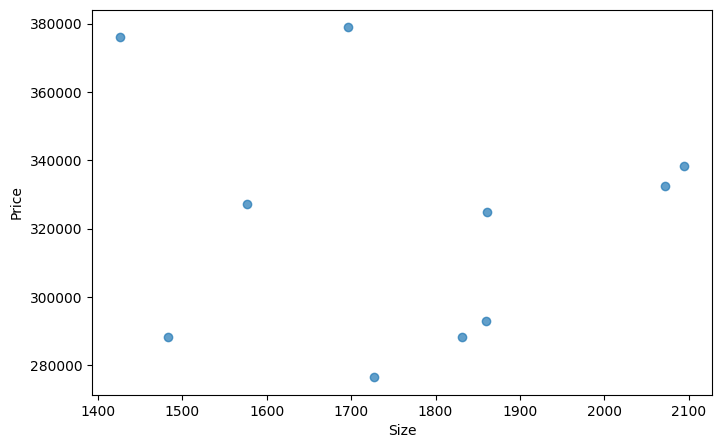

In [14]:
import matplotlib.pyplot as plt

# Generate dummy housing market data
np.random.seed(42)
num_houses = 10
prices = np.random.normal(loc=300000, scale=50000, size=num_houses)  # House prices
sizes = np.random.normal(loc=2000, scale=300, size=num_houses)       # House sizes in sq ft

# Plot the data
plt.figure(figsize=(8, 5)) # Create a figure and set its size
plt.scatter(sizes, prices, alpha=0.7) # Scatter plot, sizes on x-axis, prices on y-axis with some transparency
plt.xlabel('Size') # Label for x-axis
plt.ylabel('Price') # Label for y-axis
plt.show()

<Axes: title={'center': 'Dummy Housing Market Data'}, xlabel='Size', ylabel='Price'>

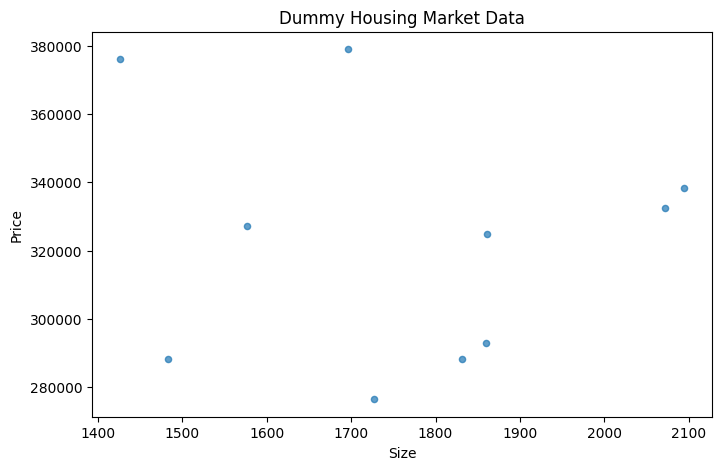

In [15]:
# Alternatively, using pandas plotting
# Create a DataFrame
housing_data = pd.DataFrame({
    'Price': prices,
    'Size': sizes,
})
housing_data.plot(kind='scatter', x='Size', y='Price', alpha=0.7, figsize=(8,5), title='Dummy Housing Market Data')

Text(0.5, 1.0, 'House Price vs Year Built')

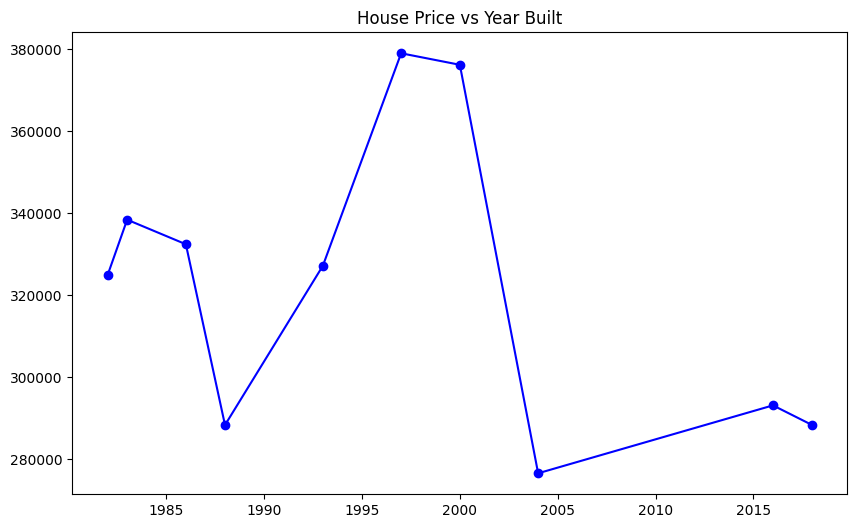

In [16]:
year_built = np.random.randint(1980, 2021, size=num_houses)  # Year built

# Plot Line plot of Price vs Year Built in sorting order of Year Built
sorted_indices = np.argsort(year_built) # Indices that would sort data by age
plt.figure(figsize=(10, 6))
plt.plot(year_built[sorted_indices], prices[sorted_indices], marker='o', linestyle='-', color='b')
plt.title('House Price vs Year Built')

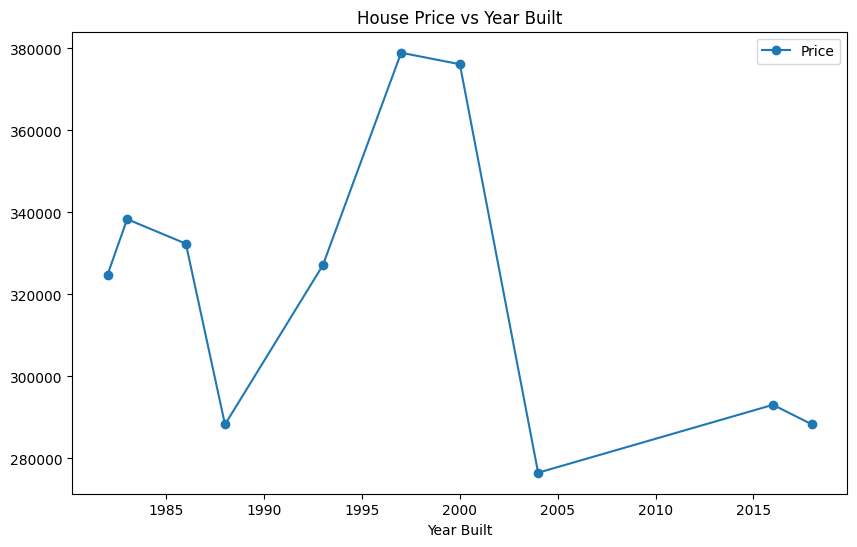

In [17]:
housing_data['Year Built'] = year_built
housing_data.sort_values(by='Year Built', inplace=True) # Sort DataFrame by Year Built
housing_data.plot(kind='line', x='Year Built', y='Price', marker='o', figsize=(10,6), title='House Price vs Year Built')
plt.show()

In [18]:
# Dummy Classification Data
classes = ['Hot Dog','Not Hot Dog'] # 1: Hot Dog, 0: Not Hot Dog
num_samples = 1000
np.random.seed(42)
probabilities = np.random.rand(num_samples) # Random probabilities between 0 and 1
labels = np.random.choice([0,1], num_samples) # Randomly assign one of the two
total_ones = (labels==1).sum()
probabilities[labels == 1] += np.random.rand(total_ones) # Increase probability for 'Hot Dog' class
probabilities = np.clip(probabilities, 0, 1) # Ensure probabilities are between
predictions = np.where(probabilities > 0.5, 1, 0) # Predict 'Hot Dog' if probability > 0.5 else 'Not Hot Dog'
classification_df = pd.DataFrame({
    'Probability': probabilities,
    'True Label': labels,
    'Predicted Label': predictions
})
print("Classification DataFrame:\n", classification_df.head())

Classification DataFrame:
    Probability  True Label  Predicted Label
0     0.374540           0                0
1     1.000000           1                1
2     1.000000           1                1
3     0.624301           1                1
4     0.497266           1                0


In [19]:
# Example: Find total number of correct predictions
indices = classification_df['True Label'] == classification_df['Predicted Label']
total_correct = np.sum(indices)
print("Total correct predictions:", total_correct)

Total correct predictions: 673


## Problem 2: Generate the Confusion Matrix

In [20]:
def generate_confusion_matrix(df,threshold=0.5):
    predicted_positive = (df['Probability'] > threshold).astype(int)
    # YOUR CHANGES HERE
    
    True_Positive = np.sum((predicted_positive == 1) & (df['True Label'] == 1)) # Predicted 1, Actual 1
    True_Negative = np.sum((predicted_positive == 0) & (df['True Label'] == 0)) # Predicted 0, Actual 0
    False_Positive = np.sum((predicted_positive == 1) & (df['True Label'] == 0)) # Predicted 1, Actual 0
    False_Negative = np.sum((predicted_positive == 0) & (df['True Label'] == 1)) # Predicted 0, Actual 1
    return True_Positive, True_Negative, False_Positive, False_Negative


In [21]:
True_Positive, True_Negative, False_Positive, False_Negative = generate_confusion_matrix(classification_df)
confusion_matrix = pd.DataFrame({
    'Predicted Positive': [True_Positive, False_Positive],
    'Predicted Negative': [False_Negative, True_Negative]
}, index=['Actual Positive', 'Actual Negative'])
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
                  Predicted Positive  Predicted Negative
Actual Positive                 428                  71
Actual Negative                 256                 245


## Problem 3: Plotting ROC Curves


(0.0, 1.0)

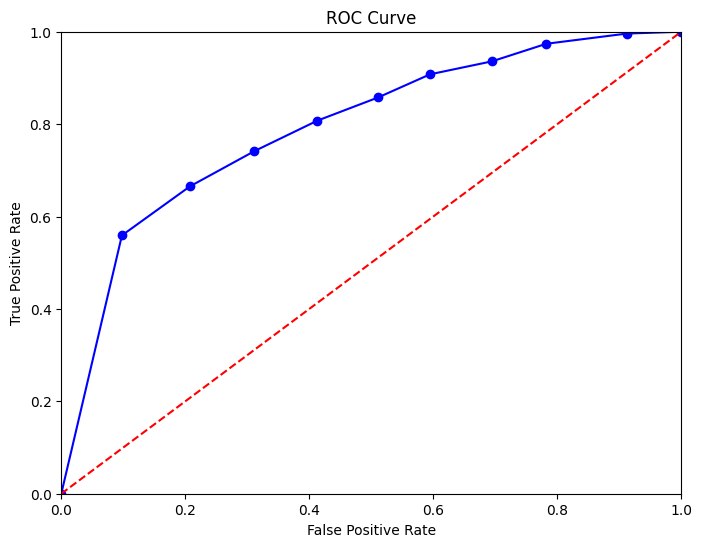

In [29]:
# get_FPR_TPR
def get_FPR_TPR(False_Positive, True_Negative, True_Positive, False_Negative):
    # YOUR CHANGES HERE
    FPR = False_Positive / (False_Positive + True_Negative) if (False_Positive + True_Negative) > 0 else 0
    TPR = True_Positive / (True_Positive + False_Negative) if (True_Positive + False_Negative) > 0 else 0
    return FPR, TPR

FPR_list = []
TPR_list = []
Thresholds = []
# Vary threshold from 0.0 to 1.0 in steps of 0.1 and compute FPR and TPR
for threshold in np.arange(0.0, 1.1, 0.1):
    TP, TN, FP, FN = generate_confusion_matrix(classification_df, threshold)
    fpr, tpr = get_FPR_TPR(FP, TN, TP, FN)
    FPR_list.append(fpr)
    TPR_list.append(tpr)
    Thresholds.append(threshold)


plt.figure(figsize=(8, 6))
plt.plot(FPR_list, TPR_list, marker='o', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r') # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [30]:
FPR_TPR_df = pd.DataFrame({
    'Threshold': Thresholds,
    'FPR': FPR_list,
    'TPR': TPR_list
})
FPR_TPR_df

,Threshold,FPR,TPR
0,0.0,1.000000,1.000000
1,0.1,0.912176,0.995992
2,0.2,0.782435,0.973948
3,0.3,0.694611,0.935872
4,0.4,0.594810,0.907816
5,0.5,0.510978,0.857715
6,0.6,0.413174,0.807615
7,0.7,0.311377,0.741483
8,0.8,0.207585,0.665331
9,0.9,0.097804,0.559118


## Problem 4: Select threshold that gives maximum TPR given FPR < 0.1

In [31]:
max_tpr = 0
best_threshold = 0
best_fpr = 0
for fpr, tpr, threshold in zip(FPR_list, TPR_list, Thresholds):
    # YOUR CHANGES HERE
    if fpr < 0.1:
        if tpr > max_tpr:
            max_tpr = tpr
            best_threshold = threshold
            best_fpr = fpr
    pass
print(f"Best threshold with FPR < 0.1: {best_threshold}, TPR: {max_tpr}, FPR: {best_fpr}")

Best threshold with FPR < 0.1: 0.9, TPR: 0.5591182364729459, FPR: 0.09780439121756487
